<a href="https://colab.research.google.com/github/AAgusCF/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
from matplotlib import pyplot as plt

#1. Análisis de facturación



In [3]:
tienda_ingresos = list(tienda['Precio'])
tienda2_ingresos = list(tienda2['Precio'])
tienda3_ingresos = list(tienda3['Precio'])
tienda4_ingresos = list(tienda4['Precio'])

In [4]:
def sum_ingresos(lista_precios):
  precios = []
  for l in lista_precios:
    precios.append(sum(l))
  return precios

In [5]:
tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
ingresos_por_tienda = sum_ingresos([tienda_ingresos, tienda2_ingresos, tienda3_ingresos, tienda4_ingresos])

In [6]:
ingresos_dict = {tiendas[i]: ingresos_por_tienda[i] for i in range(len(tiendas))}

In [7]:
ingresos_dict.items()

dict_items([('Tienda1', 1150880400.0), ('Tienda2', 1116343500.0), ('Tienda3', 1098019600.0), ('Tienda4', 1038375700.0)])

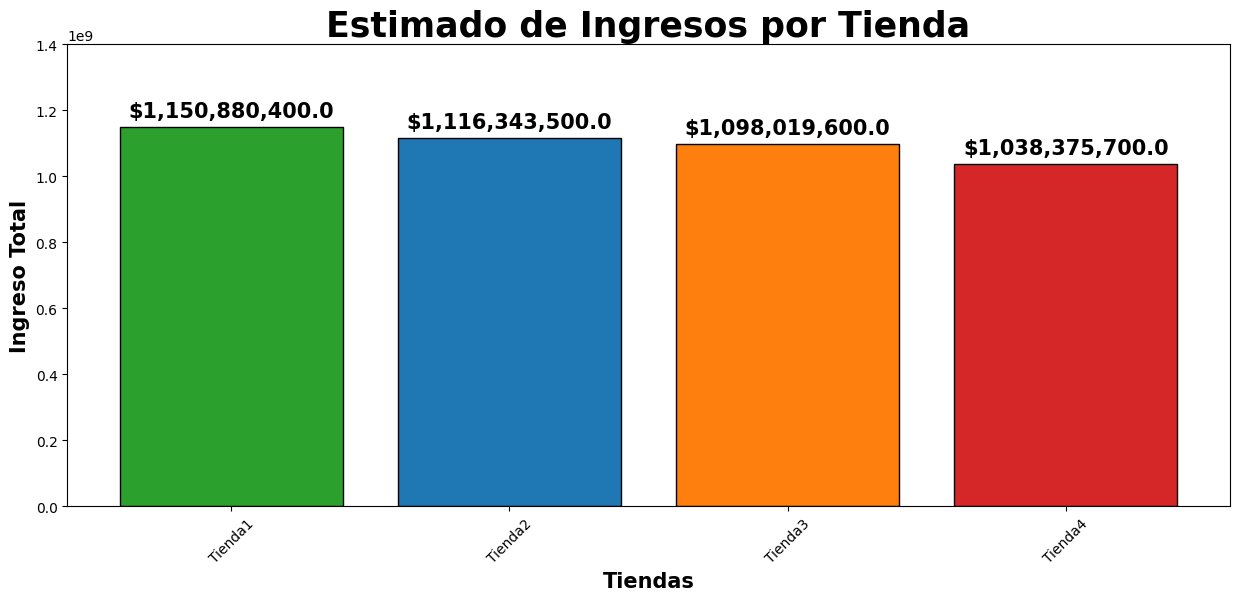

In [8]:
bar_colors = ['tab:green', 'tab:blue', 'tab:orange', 'tab:red']

label_values = [ f"${v:,.1f}" for v in ingresos_dict.values()]
dict_values = list(ingresos_dict.values())
dict_keys = list(ingresos_dict.keys())

fig, ax = plt.subplots(figsize=(15,6))
ax.set_ylabel('Ingreso Total', fontweight='bold', fontsize=15)
ax.set_xlabel('Tiendas', fontweight='bold', fontsize=15)
ax.set_title('Estimado de Ingresos por Tienda', fontweight='bold', fontsize=25)
barplot=ax.bar(x=dict_keys, height=dict_values, ec='black', color=bar_colors, width=0.8)
ax.bar_label(barplot, labels=label_values, label_type='edge', padding=4, fontweight= 'bold',fontsize=15)
ax.set_ylim([0,1400000000.0])
ax.xaxis.set_tick_params(rotation=45)
plt.show()

# 2. Ventas por categoría

In [9]:
tienda_1_ventas_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index()
tienda_2_ventas_categoria = tienda2.groupby('Categoría del Producto')['Precio'].sum().reset_index()
tienda_3_ventas_categoria = tienda3.groupby('Categoría del Producto')['Precio'].sum().reset_index()
tienda_4_ventas_categoria = tienda4.groupby('Categoría del Producto')['Precio'].sum().reset_index()

tienda_1_ventas_categoria['Tienda'] = 'Tienda 1'
tienda_2_ventas_categoria['Tienda'] = 'Tienda 2'
tienda_3_ventas_categoria['Tienda'] = 'Tienda 3'
tienda_4_ventas_categoria['Tienda'] = 'Tienda 4'

tienda_1_ventas_categoria.head()

,Categoría del Producto,Precio,Tienda
0,Artículos para el hogar,12698400.0,Tienda 1
1,Deportes y diversión,39290000.0,Tienda 1
2,Electrodomésticos,363685200.0,Tienda 1
3,Electrónicos,429493500.0,Tienda 1
4,Instrumentos musicales,91299000.0,Tienda 1


In [10]:
ventas_combinadas = pd.concat([tienda_1_ventas_categoria,
                               tienda_2_ventas_categoria,
                               tienda_3_ventas_categoria,
                               tienda_4_ventas_categoria])

ventas_por_categoria_tienda = ventas_combinadas.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()


In [11]:
pivot_ventas = ventas_combinadas.pivot(index='Categoría del Producto', columns='Tienda', values='Precio')
print(pivot_ventas)

Tienda                      Tienda 1     Tienda 2     Tienda 3     Tienda 4
Categoría del Producto                                                     
Artículos para el hogar   12698400.0   14746900.0   15060000.0   15074500.0
Deportes y diversión      39290000.0   34744500.0   35593100.0   33350100.0
Electrodomésticos        363685200.0  348567800.0  329237900.0  283260200.0
Electrónicos             429493500.0  410831100.0  410775800.0  409476100.0
Instrumentos musicales    91299000.0  104990300.0   77380900.0   75102400.0
Juguetes                  17995700.0   15945400.0   19401100.0   20262200.0
Libros                     8784900.0   10091200.0    9498700.0    9321300.0
Muebles                  187633700.0  176426300.0  201072100.0  192528900.0


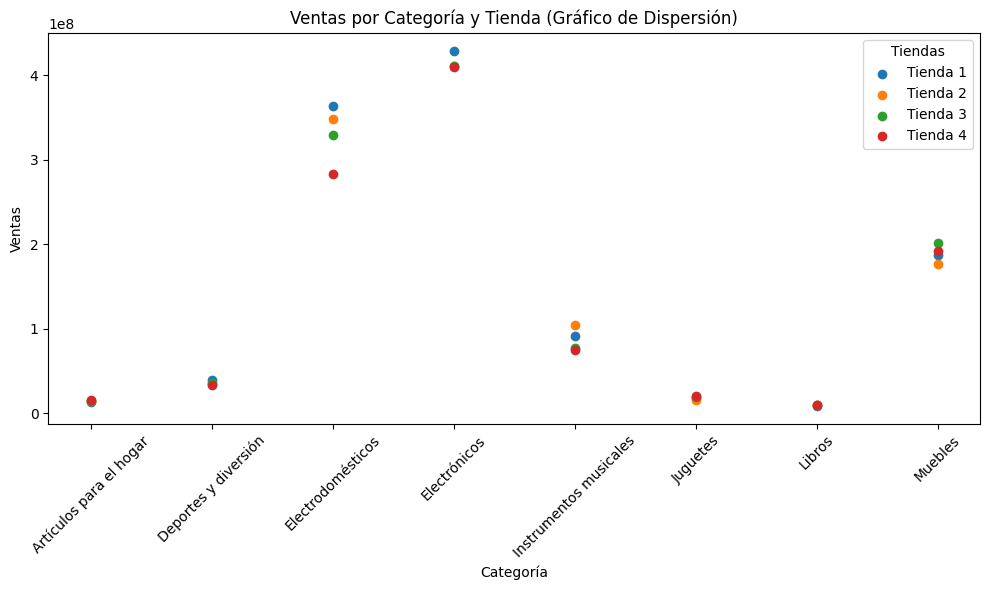

In [12]:
plt.figure(figsize=(10, 6))

for tienda in pivot_ventas.columns:
    plt.scatter(pivot_ventas.index, pivot_ventas[tienda], label=tienda)

plt.title('Ventas por Categoría y Tienda (Gráfico de Dispersión)')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend(title="Tiendas")

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [13]:
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda['Calificación'] = pd.to_numeric(tienda['Calificación'], errors='coerce')
tienda2['Calificación'] = pd.to_numeric(tienda2['Calificación'], errors='coerce')
tienda3['Calificación'] = pd.to_numeric(tienda3['Calificación'], errors='coerce')
tienda4['Calificación'] = pd.to_numeric(tienda4['Calificación'], errors='coerce')

promedio_tienda_1 = tienda['Calificación'].mean()
promedio_tienda_2 = tienda2['Calificación'].mean()
promedio_tienda_3 = tienda3['Calificación'].mean()
promedio_tienda_4 = tienda4['Calificación'].mean()

In [14]:
print("\nPromedio de calificación por tienda:")
print(f"Tienda 1: {promedio_tienda_1}")
print(f"Tienda 2: {promedio_tienda_2}")
print(f"Tienda 3: {promedio_tienda_3}")
print(f"Tienda 4: {promedio_tienda_4}")


Promedio de calificación por tienda:
Tienda 1: 3.976685036032217
Tienda 2: 4.037303942348453
Tienda 3: 4.048325561678677
Tienda 4: 3.9957591178965224


In [15]:
promedios = {
    'Tienda 1': promedio_tienda_1,
    'Tienda 2': promedio_tienda_2,
    'Tienda 3': promedio_tienda_3,
    'Tienda 4': promedio_tienda_4
}

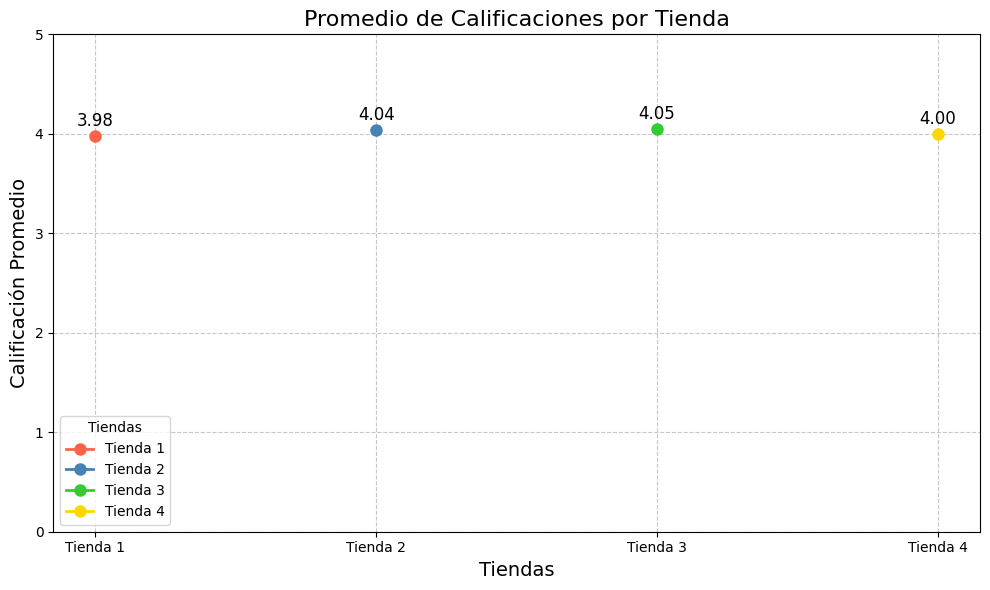

In [16]:
colores = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']

plt.figure(figsize=(10, 6))
tiendas = list(promedios.keys())
valores = list(promedios.values())

for i, tienda in enumerate(tiendas):
    plt.plot(tienda, valores[i], marker='o', color=colores[i], linestyle='-', linewidth=2, markersize=8, label=tienda)

plt.title('Promedio de Calificaciones por Tienda', fontsize=16)
plt.ylabel('Calificación Promedio', fontsize=14)
plt.xlabel('Tiendas', fontsize=14)
plt.ylim(0, 5)
plt.grid(True, which='both', linestyle='--', alpha=0.7)

for i, valor in enumerate(valores):
    plt.text(tiendas[i], valor + 0.1, f'{valor:.2f}', ha='center', fontsize=12)

plt.legend(title="Tiendas")

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [17]:
def productos_mas_menos_vendidos(df):
    productos_ordenados = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    producto_mas_vendido = productos_ordenados.idxmax()
    ventas_producto_mas_vendido = productos_ordenados.max()
    producto_menos_vendido = productos_ordenados.idxmin()
    ventas_producto_menos_vendido = productos_ordenados.min()

    return producto_mas_vendido, ventas_producto_mas_vendido, producto_menos_vendido, ventas_producto_menos_vendido

In [18]:
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

producto_mas_vendido_1, ventas_mas_vendido_1, producto_menos_vendido_1, ventas_menos_vendido_1 = productos_mas_menos_vendidos(tienda)
producto_mas_vendido_2, ventas_mas_vendido_2, producto_menos_vendido_2, ventas_menos_vendido_2 = productos_mas_menos_vendidos(tienda2)
producto_mas_vendido_3, ventas_mas_vendido_3, producto_menos_vendido_3, ventas_menos_vendido_3 = productos_mas_menos_vendidos(tienda3)
producto_mas_vendido_4, ventas_mas_vendido_4, producto_menos_vendido_4, ventas_menos_vendido_4 = productos_mas_menos_vendidos(tienda4)

In [19]:
resumen_df = pd.DataFrame({
    'Producto más vendido': [producto_mas_vendido_1, producto_mas_vendido_2, producto_mas_vendido_3, producto_mas_vendido_4],
    'Ventas más vendido': [ventas_mas_vendido_1, ventas_mas_vendido_2, ventas_mas_vendido_3, ventas_mas_vendido_4],
    'Producto menos vendido': [producto_menos_vendido_1, producto_menos_vendido_2, producto_menos_vendido_3, producto_menos_vendido_4],
    'Ventas menos vendido': [ventas_menos_vendido_1, ventas_menos_vendido_2, ventas_menos_vendido_3, ventas_menos_vendido_4]
}, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

print(resumen_df)

         Producto más vendido  Ventas más vendido Producto menos vendido  \
Tienda 1        TV LED UHD 4K         142150200.0     Cuerda para saltar   
Tienda 2            Iphone 15         113225800.0        Cubo mágico 8x8   
Tienda 3         Refrigerador          99889700.0        Cubo mágico 8x8   
Tienda 4            Iphone 15          96697500.0     Cuerda para saltar   

          Ventas menos vendido  
Tienda 1              652800.0  
Tienda 2              643600.0  
Tienda 3              640400.0  
Tienda 4              704800.0  


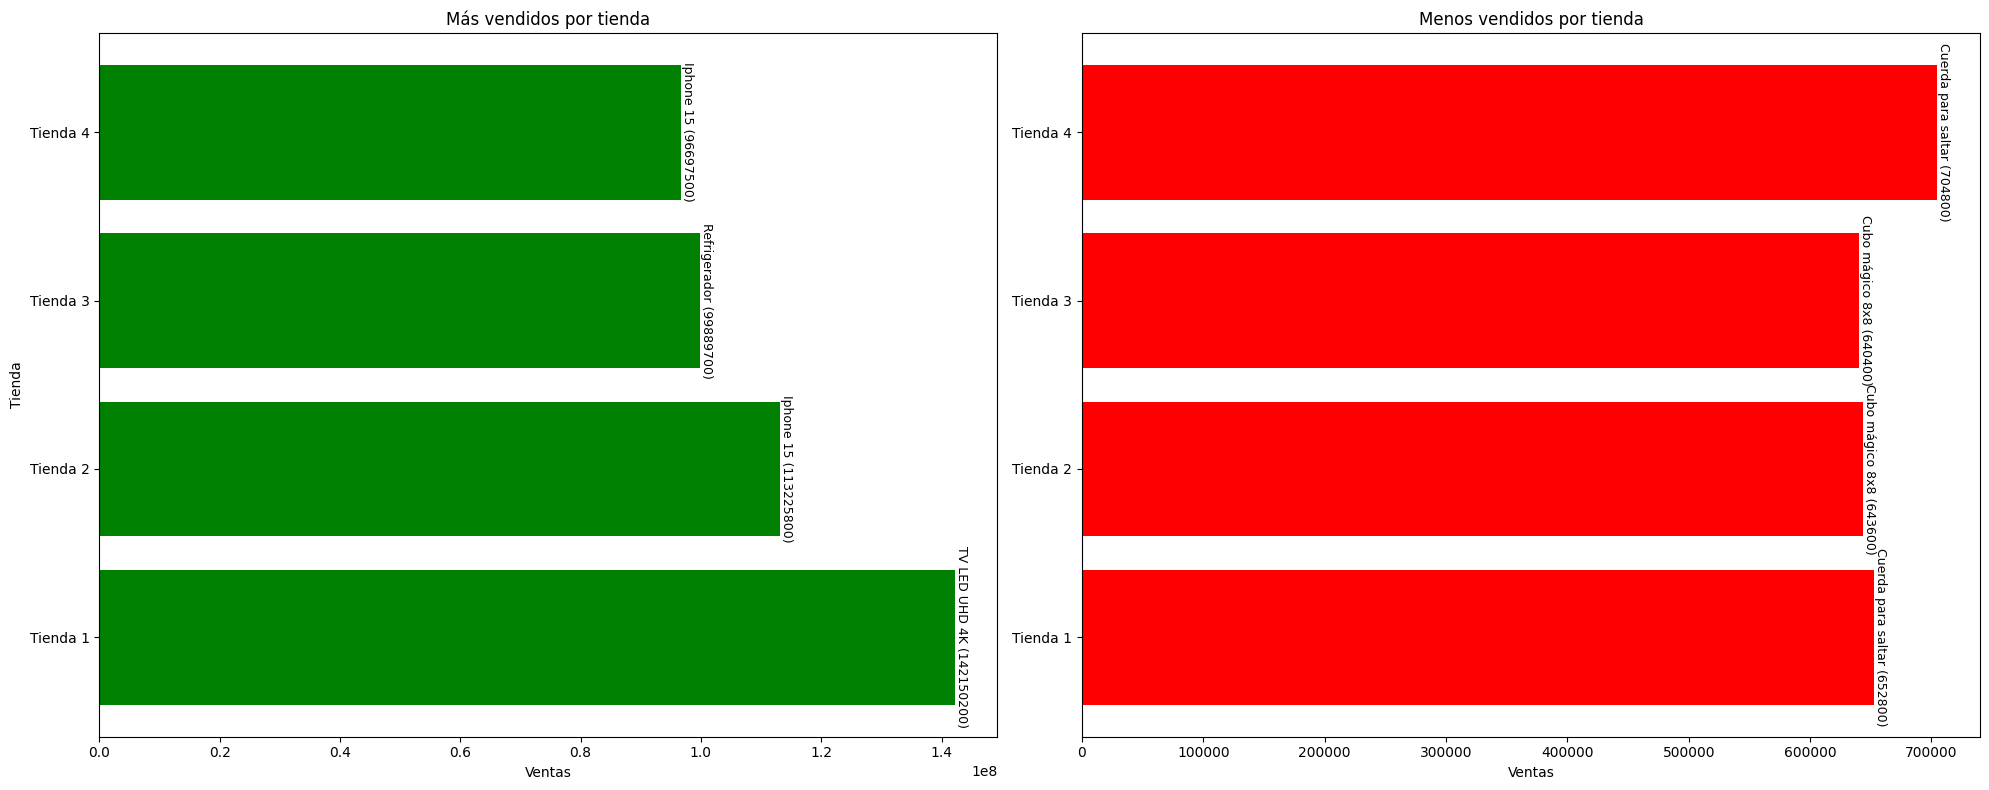

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.barh(resumen_df.index, resumen_df['Ventas más vendido'], color='green')
for i, (producto, ventas) in enumerate(zip(resumen_df['Producto más vendido'], resumen_df['Ventas más vendido'])):
    plt.text(ventas + 1, i, f'{producto} ({ventas:.0f})', va='center', fontsize=9, rotation=270)
plt.title('Más vendidos por tienda')
plt.xlabel('Ventas')
plt.ylabel('Tienda')

plt.subplot(1, 2, 2)
plt.barh(resumen_df.index, resumen_df['Ventas menos vendido'], color='red')
for i, (producto, ventas) in enumerate(zip(resumen_df['Producto menos vendido'], resumen_df['Ventas menos vendido'])):
    plt.text(ventas + 1, i, f'{producto} ({ventas:.0f})', va='center', fontsize=9, rotation=270)
plt.title('Menos vendidos por tienda')
plt.xlabel('Ventas')
plt.ylabel('')

plt.tight_layout()
plt.show()

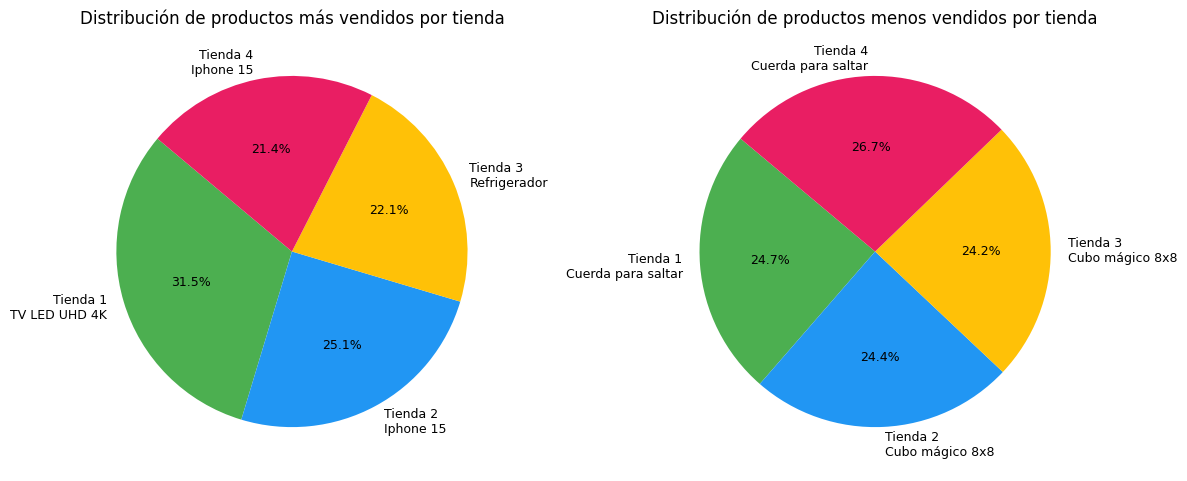

In [21]:
colores = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(
    resumen_df['Ventas más vendido'],
    labels=[f'{tienda}\n{producto}' for tienda, producto in zip(resumen_df.index, resumen_df['Producto más vendido'])],
    autopct='%1.1f%%',
    colors=colores,
    startangle=140,
    textprops={'fontsize': 9}
)
plt.title('Distribución de productos más vendidos por tienda', fontsize=12)

plt.subplot(1, 2, 2)
plt.pie(
    resumen_df['Ventas menos vendido'],
    labels=[f'{tienda}\n{producto}' for tienda, producto in zip(resumen_df.index, resumen_df['Producto menos vendido'])],
    autopct='%1.1f%%',
    colors=colores,
    startangle=140,
    textprops={'fontsize': 9}
)
plt.title('Distribución de productos menos vendidos por tienda', fontsize=12)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [22]:
for df in [tienda, tienda2, tienda3, tienda4]:
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

In [23]:
promedio_envio_1 = tienda['Costo de envío'].mean()
promedio_envio_2 = tienda2['Costo de envío'].mean()
promedio_envio_3 = tienda3['Costo de envío'].mean()
promedio_envio_4 = tienda4['Costo de envío'].mean()

envio_df = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo envío promedio': [promedio_envio_1, promedio_envio_2, promedio_envio_3, promedio_envio_4]
})

print(envio_df)

     Tienda  Costo envío promedio
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


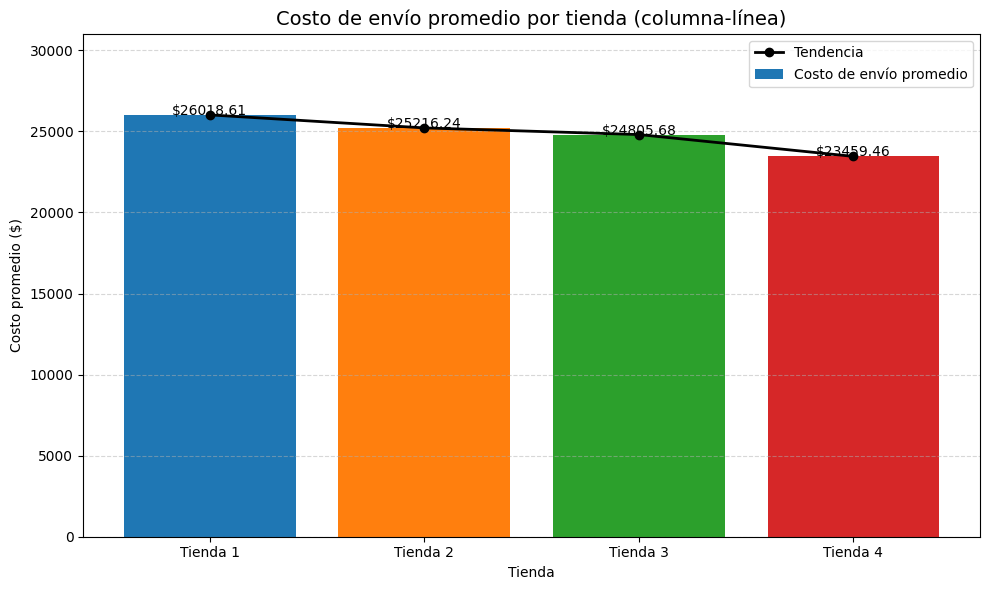

In [24]:
tiendas = envio_df['Tienda'].tolist()
costos = envio_df['Costo envío promedio'].tolist()

colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(10, 6))

plt.bar(tiendas, costos, color=colores, label='Costo de envío promedio')

plt.plot(tiendas, costos, color='black', marker='o', linestyle='-', linewidth=2, label='Tendencia')

for i, v in enumerate(costos):
    plt.text(i, v + 0.2, f"${v:.2f}", ha='center', fontsize=10)

plt.title('Costo de envío promedio por tienda (columna-línea)', fontsize=14)
plt.ylabel('Costo promedio ($)')
plt.xlabel('Tienda')
plt.ylim(0, max(costos) + 5000)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 6. Informe Final

<h1>Introducción</h1>
<p>Para tomar la mejor decisión sobre la tienda que se debe vender, es necesario analizar el rendimiento de las cuatro tiendas en función de distintos indicadores clave, que son:<br>
<ul>
  <li>Ingresos totales por tienda</li>
  <li>Castegorías de productos más y menos vendidas</li>
  <li>Calificaciones promedio de los clientes por tienda</li>
  <li>Productos más y menos vendidos</li>
  <li>Coste de envío promedio para cada tienda</li>
</ul>

</p>

<h1>Desarrollo del Análisis</h1>
<p>
<ol>
  <li>Ingresos Totales<br>
      <table>
        <tr>
          <th>Tienda</th>
          <th>Ingresos Totales</th>
        </tr>
        <tr>
          <td>Tienda 1</td>
          <td>$1,150,880,400</td>
        </tr>
        <tr>
          <td>Tienda 2</td>
          <td>$1,116,343,500</td>
        </tr>
        <tr>
          <td>Tienda 3</td>
          <td>$1,098,019,600</td>
        </tr>
        <tr>
          <td><b><u>Tienda 4</u></b></td>
          <td><b><u>$1,038,375,700</u></b> <- la más baja</td>
        </tr>
      </table>
      <br>
      <p><b>La Tienda 4</b> genera los menores ingresos totales.</p>
      <br>
  </li>
  <li>Categorías de Productos más y menos vendidos<br>
      <table>
        <tr>
          <th>Categoría</th>
          <th>Tienda 4 ($)</th>
        </tr>
        <tr>
          <td>Electrónicos</td>
          <td>409,476,100</td>
        </tr>
        <tr>
          <td><b><u>Electrodomésticos</u></b></td>
          <td><b><u>283,260,200</u></b> <- la más baja</td>
        </tr>
        <tr>
          <td>Muebles</td>
          <td>192,525,900</td>
        </tr>
        <tr>
          <td>Artículos para el hogar</td>
          <td>15,074,500</td>
        </tr>
        <tr>
          <td>Libros</td>
          <td>9,321,300</td>
        </tr>
      </table>
      <br>
      <p>La categoría de<b> Electrodomésticos </b> es la categoría en la que mayor diferencia hay entre las tiendas. Por lo que la Tienda 4 es la que muestra un desempeño menor.</p>
      <br>
  </li>
  <li>Calificación promedio de clientes<br>
      <table>
        <tr>
          <th>Tienda</th>
          <th>Calificación</th>
        </tr>
        <tr>
          <td>Tienda 3</td>
          <td>4.048</td>
        </tr>
        <tr>
          <td>Tienda 2</td>
          <td>4.037</td>
        </tr>
        <tr>
          <td><b><u>Tienda 4</u></b></td>
          <td><b><u>3.996</u></b> <- segunda más baja</td>
        </tr>
        <tr>
          <td>Tienda 1</td>
          <td>3.976</td>
        </tr>
      </table>
      <br>
      <p>Aunque la<b> Tienda 1 </b>tiene la peor calificación, la<b> Tienda 4 </b>está muy cerca y previamente en anteriories indicadores, la<b> Tienda 4 </b>fue la que peor rendimiento ha tenido.</p>
      <br>
  </li>
  <li>Productos más y menos vendidos<br>
      <ul>
        <li>
          <b>Producto más vendido &#40Tienda 4&#41:</b> iPhone 15 - $96.7M &#40el menor entre los top productos de las otras tiendas&#41
        </li>
        <li>
          <b>Producto menos vendido:</b> Cuerda para saltar - $704,800
        </li>
      </ul>
      <br>
      <p>En comparación, el producto más vendido de la<b> Tienda 4 </b>tiene el menor volumen entre todos los "más vendidos" de las demás tiendas.</p>
      <br>
  </li>
  <li>Costo promedio de envío<br>
      <table>
        <tr>
          <th>Tienda</th>
          <th>Costo promedio de envío</th>
        </tr>
        <tr>
          <td>Tienda 1</td>
          <td>$26,018.61</td>
        </tr>
        <tr>
          <td>Tienda 2</td>
          <td>$25,216.23</td>
        </tr>
        <tr>
          <td>Tienda 3</td>
          <td>$24,805.68</td>
        </tr>
        <tr>
          <td><b><u>Tienda 4</b></u></td>
          <td><b><u>$23,459.46</b></u></td>
        </tr>
      </table>
      <br>
      <p>La<b> Tienda 4 </b>tiene el menor costo de envío, lo cual es una fortaleza,<b> pero no compensa sus debilidades </b>en ingresos, productos y ventas por categoría.</p>
      <br>
  </li>
</ol>
</p>

<h1>Conclusión</h1>
<h2>Tienda menos eficiente: Tienda 4</h2>
<h3>
  Justificación:
  <ul>
      <li>Tiene <b>los ingresos totales más bajos.</b></li>
      <li>Desempeño pobre en<b> categorías clave </b>como electrodomésticos.</li>
      <li>Su producto más vendido es el<b> menos lucrativo </b>en comparación con las otras tiendas.</li>
      <li>Su calificación promedio es la segunda<b> más baja.</b></li>
      <li>A pesar de tener el<b> mejor coste logístico</b>, no logra traducirlo en una ventaja competitiva clara.</li>
  </ul>
</h3>
<br>
<h3><b>Se recomienda vender la Tienda 4</b>, ya que su bajo desempeño general sugiere una menor rentabilidad, menor volumen de ventas en productos importantes y mala valoración por parte de los clientes.</h3>